In [1]:
from collections import defaultdict

class Graph():
    def __init__(self):
    
        self.edges = defaultdict(list)
        self.weights = {}
    
    def add_edge(self, from_node, to_node, weight):
        # Note: assumes edges are bi-directional
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight

In [2]:
graph = Graph()

In [3]:
edges = [
 
    ('DAXINGANGLING AREA', 'HEIHE', 438),
    ('DAQING', 'QIQIHAR', 159),  
    ('DAQING', 'SUIHUA', 200),
    ('HARBIN', 'JIAMUSI', 439),
    ('HARBIN', 'MUDANJIANG', 336),
    ('HARBIN', 'QITAIHE', 430),
    ('HARBIN', 'JIXI', 483),
    ('HARBIN', 'SHUANGYANSHAN', 457),
    ('HEGANG', 'JIAMUSI', 66.6),
    ('HEGANG', 'SUIHUA', 363),
    ('HEIHE',  'SUIHUA', 470),
    ('HARBIN', 'DAQING', 153),
    ('JIAMUSI', 'QITAIHE', 151),
    ('MUDANJIANG', 'JIXI', 169),
    ('YICHUN', 'QIQIHAR', 479),
    ('YICHUN', 'SUIHUA', 213),
    ('YICHUN', 'HEGANG', 152),
    ('YICHUN', 'HEIHE', 479),
    ('YICHUN', 'HARBIN', 323),
    ('QIQIHAR', 'SUIHUA',340),
    ('QIQIHAR', 'HEIHE',493 ),
    ('QIQIHAR', 'DAXINGANGLING AREA', 681),
    ('SUIHUA', 'DAXINGANGLING AREA', 813),
    ('SUIHUA', 'JIAMUSI', 399),
    ('SUIHUA', 'HARBIN', 112),
    ('SHUANGYANSHAN', 'QITAIHE', 228),
    ('SHUANGYANSHAN', 'JIXI', 280),
    ('SHUANGYANSHAN', 'JIAMUSI', 85.6),
    ('QITAIHE', 'MUDANJIANG', 226),
    ('QITAIHE', 'JIXI', 86.4 ),
  
]

for edge in edges:
    graph.add_edge(*edge)

In [4]:
def dijsktra(graph, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    
    # Work back through destinations in shortest path
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    # Reverse path
    path = path[::-1]
    return path

# <h1><center>DJIKSTRA'S ALGORITHM POINT PATH</h1></center>
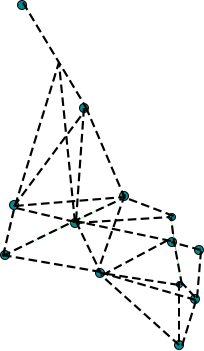

# <h1><center> HEILONGJIANG PROVINCE MAP WITH CITIES</h1></center>
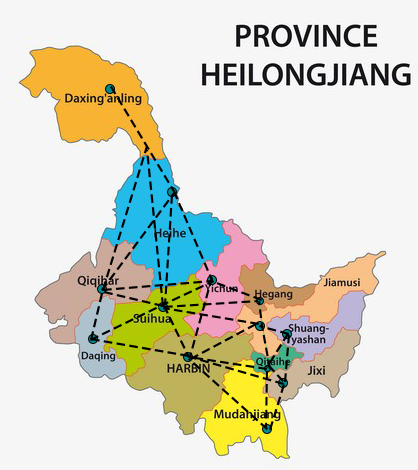

# start to destination

In [5]:
dijsktra(graph, 'DAXINGANGLING AREA', 'MUDANJIANG')

['DAXINGANGLING AREA', 'SUIHUA', 'HARBIN', 'MUDANJIANG']

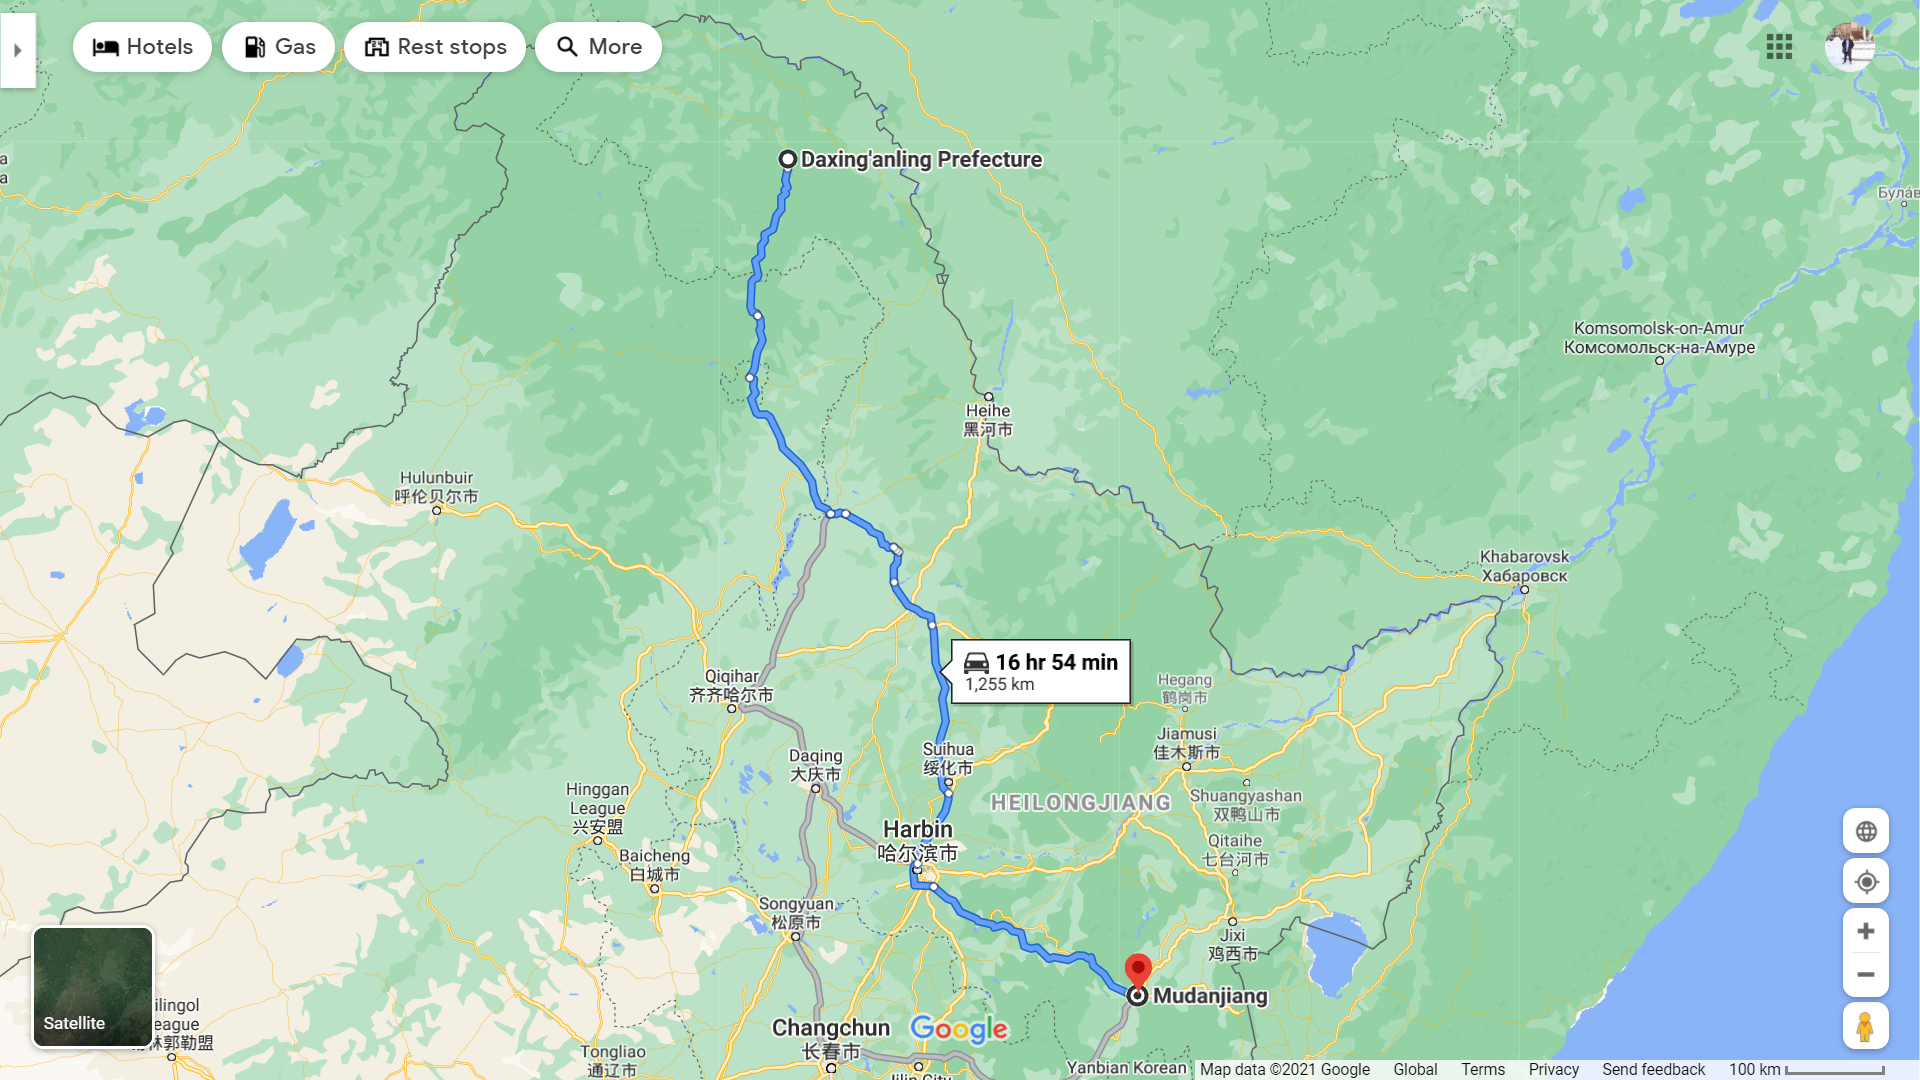

In [6]:
dijsktra(graph, 'YICHUN', 'JIXI')

['YICHUN', 'HEGANG', 'JIAMUSI', 'QITAIHE', 'JIXI']

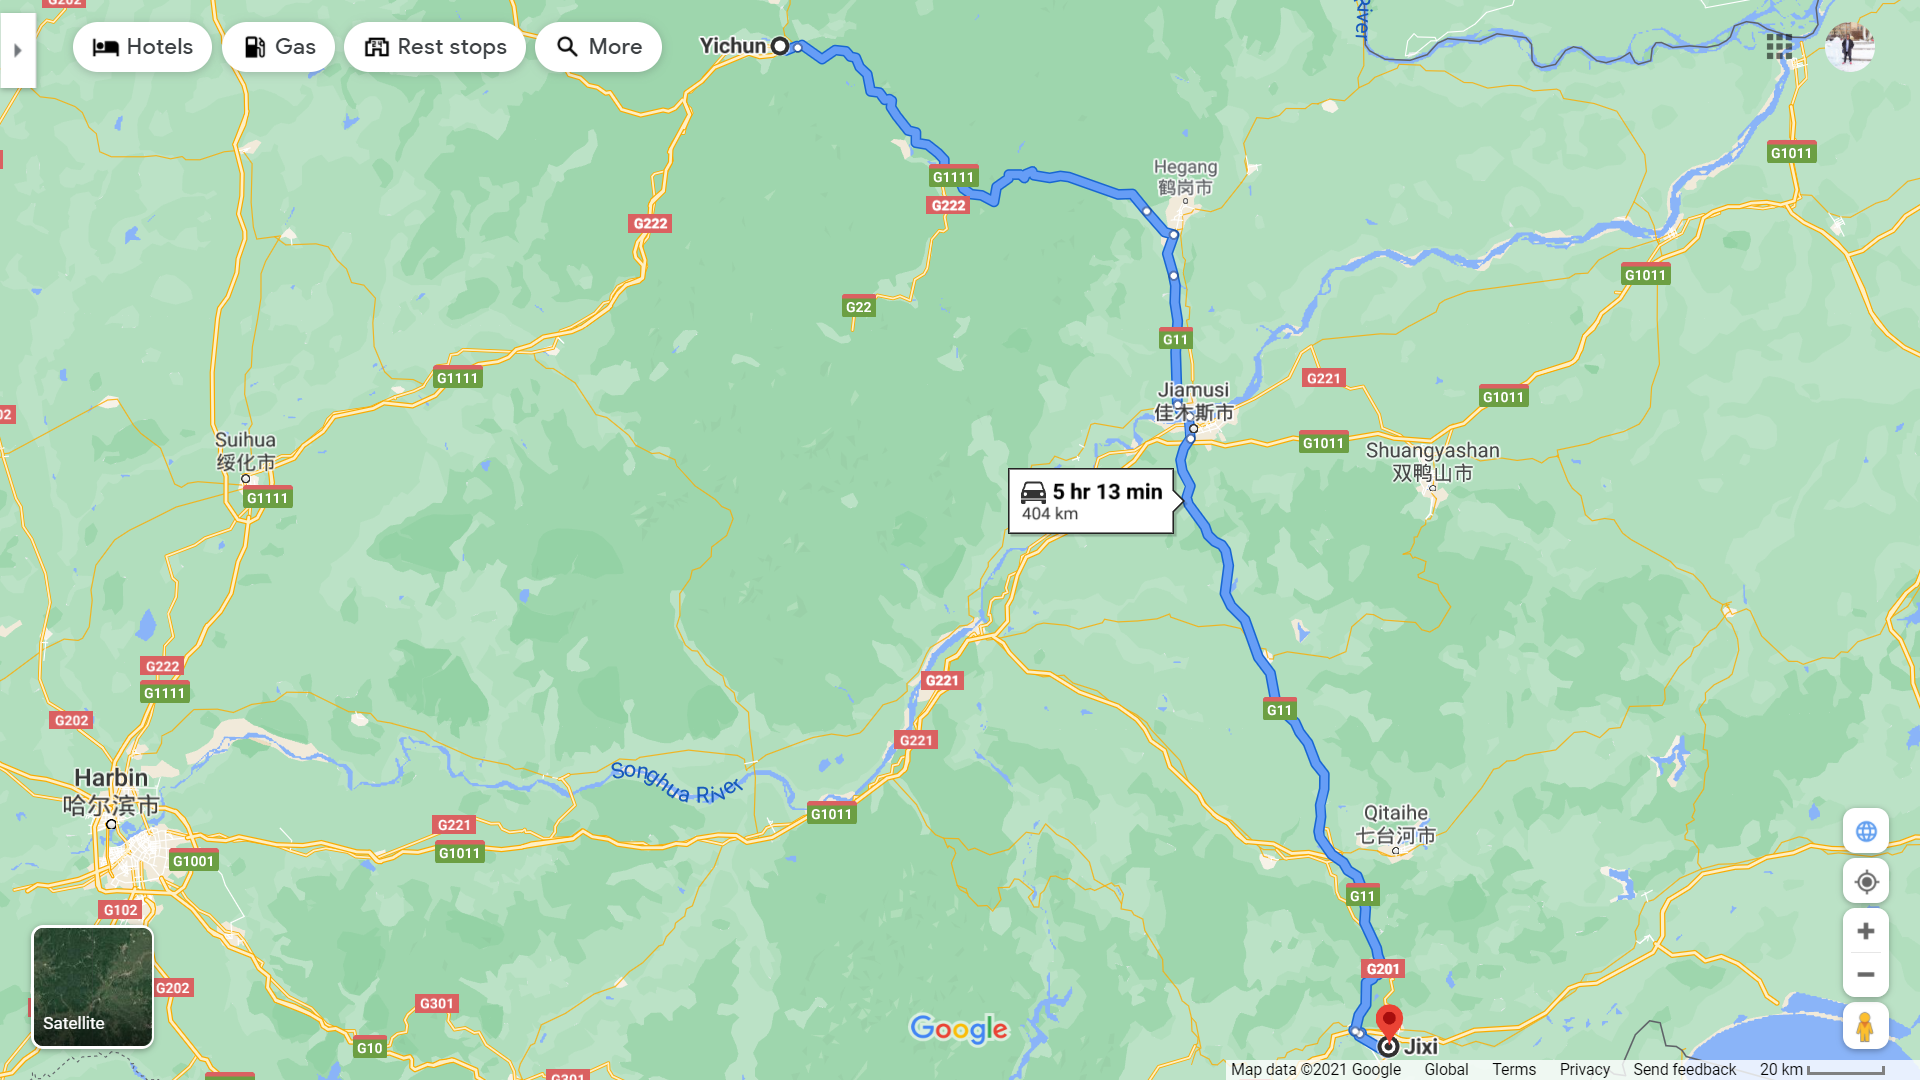